In [53]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from attr.filters import exclude
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
test=pd.read_csv(r"C:\Users\medya\Desktop\Test.csv")
train=pd.read_csv(r"C:\Users\medya\Desktop\Train.csv")
sample=pd.read_csv(r"C:\Users\medya\Desktop\sample submission.csv")

In [3]:
df=pd.concat([train,test])
df.head()

,ID,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,1,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89.0
1,2,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77.0
2,3,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70.0
3,4,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52.0
4,5,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79.0


In [4]:
df.shape
#jj

(6000, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           6000 non-null   int64  
 1   Gender                       6000 non-null   object 
 2   Height (cm)                  6000 non-null   float64
 3   Weight (kg)                  6000 non-null   float64
 4   Blood Pressure (s/d)         6000 non-null   object 
 5   Cholesterol Level (mg/dL)    6000 non-null   float64
 6   BMI                          6000 non-null   float64
 7   Blood Glucose Level (mg/dL)  6000 non-null   float64
 8   Bone Density (g/cm²)         6000 non-null   float64
 9   Vision Sharpness             6000 non-null   float64
 10  Hearing Ability (dB)         6000 non-null   float64
 11  Physical Activity Level      6000 non-null   object 
 12  Smoking Status               6000 non-null   object 
 13  Alcohol Consumption    

In [6]:
df.isnull().sum()

ID                                0
Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            2402
Diet                              0
Chronic Diseases               2598
Medication Use                 2396
Family History                 2902
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                1254
Income Level                      0
Age (years)                    3000
dtype: int64

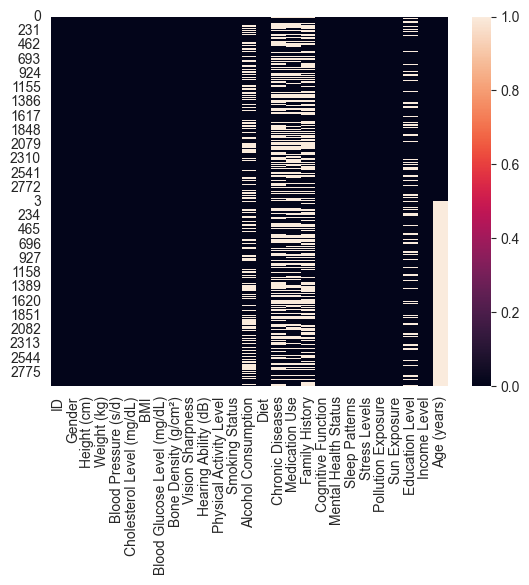

In [7]:
sns.heatmap(df.isna())
plt.show()

In [8]:
df1=df.drop(['Family History','Gender'],axis=1)

In [9]:
df1.columns

Index(['ID', 'Height (cm)', 'Weight (kg)', 'Blood Pressure (s/d)',
       'Cholesterol Level (mg/dL)', 'BMI', 'Blood Glucose Level (mg/dL)',
       'Bone Density (g/cm²)', 'Vision Sharpness', 'Hearing Ability (dB)',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diet', 'Chronic Diseases', 'Medication Use', 'Cognitive Function',
       'Mental Health Status', 'Sleep Patterns', 'Stress Levels',
       'Pollution Exposure', 'Sun Exposure', 'Education Level', 'Income Level',
       'Age (years)'],
      dtype='object')

In [10]:
df1.loc[:, 'Medication Use'] = df1['Medication Use'].fillna(df1['Medication Use'].mode()[0])
df1.loc[:, 'Chronic Diseases'] = df1['Chronic Diseases'].fillna(df1['Chronic Diseases'].mode()[0])

df1.isnull().sum()

ID                                0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            2402
Diet                              0
Chronic Diseases                  0
Medication Use                    0
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                1254
Income Level                      0
Age (years)                    3000
dtype: int64

In [11]:
df1['Physical Activity Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [12]:
data = df1[df1['Physical Activity Level'] == 'Moderate']
data.groupby('Alcohol Consumption')['Alcohol Consumption'].count()
data2 = df1[df1['Physical Activity Level'] == 'High']
data2.groupby('Alcohol Consumption')['Alcohol Consumption'].count()
data3 = df1[df1['Physical Activity Level'] == 'Low']
data3.groupby('Alcohol Consumption')['Alcohol Consumption'].count()

Alcohol Consumption
Frequent      440
Occasional    678
Name: Alcohol Consumption, dtype: int64

In [13]:
df1['Alcohol Consumption'] = df1.apply(
    lambda row: 'Occasional' if pd.isna(row['Alcohol Consumption']) and row['Physical Activity Level'] == 'Moderate'
    else 'Frequent' if pd.isna(row['Alcohol Consumption']) and row['Physical Activity Level'] in ['Low', 'High']
    else row['Alcohol Consumption'],
    axis=1
)


In [15]:
df1.isnull().sum()


ID                                0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption               0
Diet                              0
Chronic Diseases                  0
Medication Use                    0
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                1254
Income Level                      0
Age (years)                    3000
dtype: int64

In [16]:
df2=df1.drop(['Alcohol Consumption','Smoking Status','Sun Exposure','Pollution Exposure','ID','Diet','Medication Use','Chronic Diseases','Income Level','Education Level','Mental Health Status','Sleep Patterns','Stress Levels','Physical Activity Level','BMI'],axis=1)

In [17]:
df2.columns

Index(['Height (cm)', 'Weight (kg)', 'Blood Pressure (s/d)',
       'Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)',
       'Bone Density (g/cm²)', 'Vision Sharpness', 'Hearing Ability (dB)',
       'Cognitive Function', 'Age (years)'],
      dtype='object')

In [18]:
df2.head()

,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Age (years)
0,171.148359,86.185197,151/109,259.465814,157.652848,0.132868,0.200000,58.786198,44.059172,89.0
1,172.946206,79.641937,134/112,263.630292,118.507805,0.629534,0.267312,54.635270,45.312298,77.0
2,155.945488,49.167058,160/101,207.846206,143.587550,0.473487,0.248667,54.564632,56.246991,70.0
3,169.078298,56.017921,133/94,253.283779,137.448581,1.184315,0.513818,79.722963,55.196092,52.0
4,163.758355,73.966304,170/106,236.119899,145.328695,0.434562,0.306864,52.479469,53.023379,79.0


In [19]:
df2[['Systolic_BP', 'Diastolic_BP']] = df2['Blood Pressure (s/d)'].str.split('/', expand=True).astype(float)
df2.drop(columns=['Blood Pressure (s/d)'], inplace=True)


In [20]:
print(df2.head(10))

   Height (cm)  Weight (kg)  Cholesterol Level (mg/dL)  \
0   171.148359    86.185197                 259.465814   
1   172.946206    79.641937                 263.630292   
2   155.945488    49.167058                 207.846206   
3   169.078298    56.017921                 253.283779   
4   163.758355    73.966304                 236.119899   
5   174.891617    79.671483                 198.718529   
6   178.586966    86.521864                 246.339736   
7   168.002914    66.524209                 222.462440   
8   164.546917    74.405356                 204.235608   
9   164.839426    64.271711                 268.598653   

   Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  Vision Sharpness  \
0                   157.652848              0.132868          0.200000   
1                   118.507805              0.629534          0.267312   
2                   143.587550              0.473487          0.248667   
3                   137.448581              1.184315          0.5

In [21]:
df2['BMI']=df['BMI']

In [22]:
df2.drop(columns=['Height (cm)','Weight (kg)'], inplace=True)

In [23]:
print(df2.head(10))

   Cholesterol Level (mg/dL)  Blood Glucose Level (mg/dL)  \
0                 259.465814                   157.652848   
1                 263.630292                   118.507805   
2                 207.846206                   143.587550   
3                 253.283779                   137.448581   
4                 236.119899                   145.328695   
5                 198.718529                   100.928108   
6                 246.339736                   129.977078   
7                 222.462440                   116.806072   
8                 204.235608                   137.022297   
9                 268.598653                   130.056457   

   Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB)  \
0              0.132868          0.200000             58.786198   
1              0.629534          0.267312             54.635270   
2              0.473487          0.248667             54.564632   
3              1.184315          0.513818             79.722

In [24]:
columns = ['Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)',
           'Bone Density (g/cm²)', 'Vision Sharpness', 'Hearing Ability (dB)',
           'Cognitive Function', 'Systolic_BP', 'Diastolic_BP', 'BMI']


def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df





In [25]:
df_1=df2.copy()

df_cleaned1 = remove_outliers_iqr(df_1, columns)


print(f"Nombre de lignes avant : {len(df_1)}")
print(f"Nombre de lignes après : {len(df_cleaned1)}")

Nombre de lignes avant : 6000
Nombre de lignes après : 5846


In [26]:
from scipy import stats

df_2=df2.copy()
z_threshold = 3

df_cleaned2 = df_2[(stats.zscore(df_2[columns]) < z_threshold).all(axis=1)]
print(f"Nombre de lignes avant : {len(df_2)}")
print(f"Nombre de lignes après suppression des outliers : {len(df_cleaned2)}")

Nombre de lignes avant : 6000
Nombre de lignes après suppression des outliers : 5944


In [36]:
#So we choose IQR
df3=remove_outliers_iqr(df2, columns)


In [30]:
df3.shape

(5846, 10)

In [41]:
df_known = df3[df3['Age (years)'].notna()]
df_unknown = df3[df3['Age (years)'].isna()]

X_known=df_known.drop(columns=['Age (years)'])
y_known=df_known['Age (years)']
X_unknown=df_unknown.drop(columns=['Age (years)'])

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_known, y_known)

predicted_ages = model.predict(X_unknown)
predicted_ages_series = pd.Series(predicted_ages, index=df_unknown.index)
df3.loc[df3['Age (years)'].isna(), 'Age (years)'] = predicted_ages_series


In [42]:
X = df3.drop(columns=['Age (years)'])
y = df3['Age (years)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10)
}
mse_results = {}

for name, model in models.items():

    X_train_used = X_train_scaled if name == "Linear Regression" else X_train
    X_test_used = X_test_scaled if name == "Linear Regression" else X_test


    model.fit(X_train_used, y_train)


    y_pred = model.predict(X_test_used)


    mse = mean_squared_error(y_test, y_pred)
    mse_results[name] = mse
    print(f"{name}: MSE = {mse:.2f}")

Linear Regression: MSE = 19.13
Decision Tree: MSE = 24.63
Random Forest: MSE = 10.21


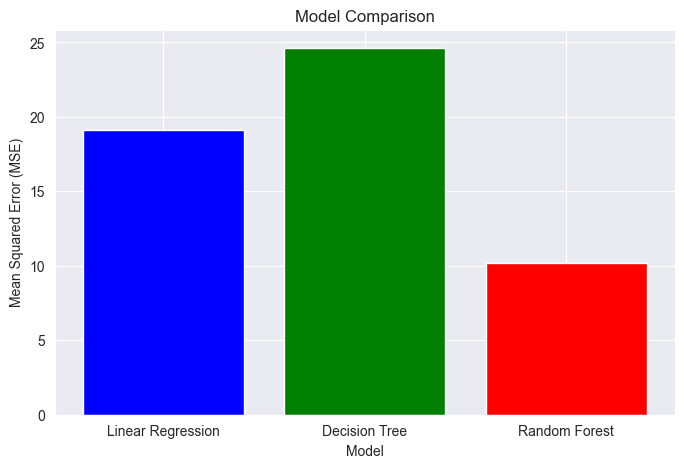

In [43]:
plt.figure(figsize=(8, 5))
plt.bar(mse_results.keys(), mse_results.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison')
plt.show()

In [54]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=10)
model.fit(X_train, y_train)
score=model.score(X_test, y_test)
print("accuracy:",score)
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


accuracy: 0.981885422150302
Mean Squared Error (MSE): 7.351216990590515
